# <center>***基于数据扰动的灵敏度分析***<center>

更多代码欢迎传送至：
>https://gitee.com/tanxin12/tanxin

## <font color=#FF0000>**导入模块与数据**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

from pandas import read_csv
from sklearn.model_selection import train_test_split

In [2]:
names = ['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度', 'Class']
df = read_csv(".\data\Iris.txt", names=names)

X = df.drop("Class", axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## <font color=#FF0000>**随便建一个模型并随便给它评价一下**

In [3]:
Model = SVC(probability=True)
y_pred = Model.fit(X_train, y_train).predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score

# 打印分类模型最好的评价系统
print("得分为%.5f" % accuracy_score(y_test, y_pred))

得分为1.00000


## <font color=#FF0000>**灵敏度分析**

### <center>**扰动处理，对噪音数据进行预测并评价**

In [5]:
# 接受过噪音的X_test得分情况
score_1, score_2, score_3, score_4 = [], [], [], []

for j in range(0, 4):

    # 备份新的X_test用于噪音处理
    df1 = np.array(X_test.copy())
    # 打印X_test的维数，方便后面做循环
    m, n = np.array(X_test).shape
    # 噪音
    error = np.ones(shape=(m, 1))

    # 按0到0.5的比例对X_test进行噪音处理
    for i in np.linspace(0, 0.5, 51):

        # 施加对应比例噪音并添加到X_test上，产生新的测试集特征df2
        error[:, 0] = np.random.uniform(-i * df1[:, j], i * df1[:, j])
        df1[:, j] = df1[:, j] + error[:, 0]
        df2 = pd.DataFrame(df1)
        df2.columns = ['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度']

        # 构建完数据后预测、打分
        y_pred = pd.DataFrame(Model.predict(df2))

        if j == 0:
            score_1.append(accuracy_score(y_test, y_pred))
        elif j == 1:
            score_2.append(accuracy_score(y_test, y_pred))
        elif j == 2:
            score_3.append(accuracy_score(y_test, y_pred))
        else:
            score_4.append(accuracy_score(y_test, y_pred))

### <center>**数据可视化**

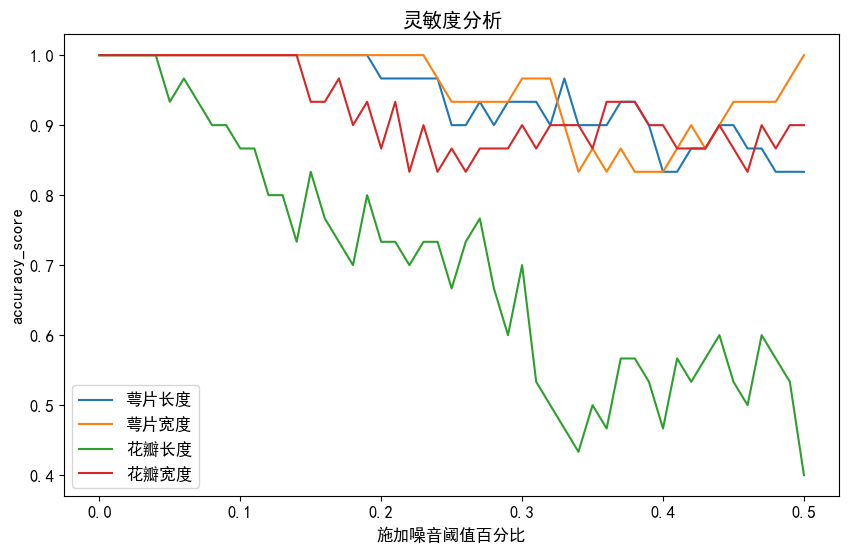

In [6]:
plt.figure(figsize=(10, 6))
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
plt.xlabel("施加噪音阈值百分比")
plt.ylabel("accuracy_score")

plt.plot(np.linspace(0, 0.5, 51), score_1, label="萼片长度")
plt.plot(np.linspace(0, 0.5, 51), score_2, label="萼片宽度")
plt.plot(np.linspace(0, 0.5, 51), score_3, label="花瓣长度")
plt.plot(np.linspace(0, 0.5, 51), score_4, label="花瓣宽度")

plt.title("灵敏度分析")
plt.legend()
plt.show()